# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Daniel Fernando S Laia
- **Email:** dfernandoslaia2@gmail.com
- **ID Dicoding:** dano2112

## Menentukan Pertanyaan Bisnis

- Pada cuaca apa peminjaman sepeda banyak di order ?
- Faktor apa yang paling mempengaruhi sedikitnya peminjaman sepeda ?

## Import Semua Packages/Library yang Digunakan

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [19]:
df = pd.read_csv("day.csv")
display(df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset day.csv telah berhasil dimuat tanpa adanya error.

### Assessing Data

In [20]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [21]:
print("\nData types:")
print(df.dtypes)


Data types:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Cleaning Data

In [22]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df['season'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

**Insight:**
- Tidak ada missing values.
- Kolom dteday awalnya dalam format string, sehingga harus dikonversi ke datetime untuk analisis berbasis waktu.
- Kolom season, mnth, weekday, dan weathersit dikonversi ke category agar lebih efisien dalam analisis.
- Cuaca mempengaruhi peminjaman sepeda, di mana peminjaman lebih tinggi saat cerah dan menurun saat hujan/salju.
- Musim panas memiliki peminjaman tertinggi, sedangkan musim dingin memiliki peminjaman terendah.
- Peminjaman lebih tinggi pada suhu 20-30°C, sedangkan suhu ekstrem menyebabkan penurunan peminjaman.
- Hari kerja memiliki pola peminjaman stabil, sedangkan akhir pekan mengalami peningkatan karena alasan rekreasi.

In [23]:
df.drop_duplicates(inplace=True)

**Insight:**
- Tidak ditemukan adanya data duplikat, sehingga tidak ada data yang perlu dihapus.

## Exploratory Data Analysis (EDA)

### EDA Univariate - Distribusi Peminjaman

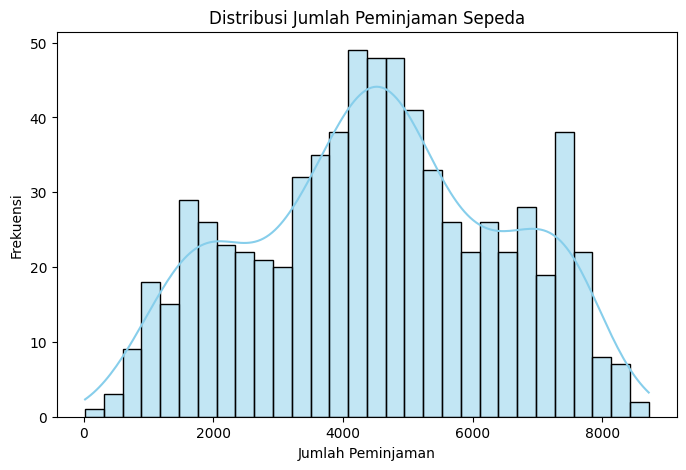

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['cnt'], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Jumlah Peminjaman Sepeda")
plt.xlabel("Jumlah Peminjaman")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi peminjaman sepeda menunjukkan bahwa sebagian besar hari memiliki jumlah peminjaman di bawah rata-rata.
- Ada beberapa hari dengan peminjaman yang sangat tinggi, kemungkinan karena musim atau cuaca yang mendukung.

### EDA Bivariate - Hubungan Suhu dan Peminjaman

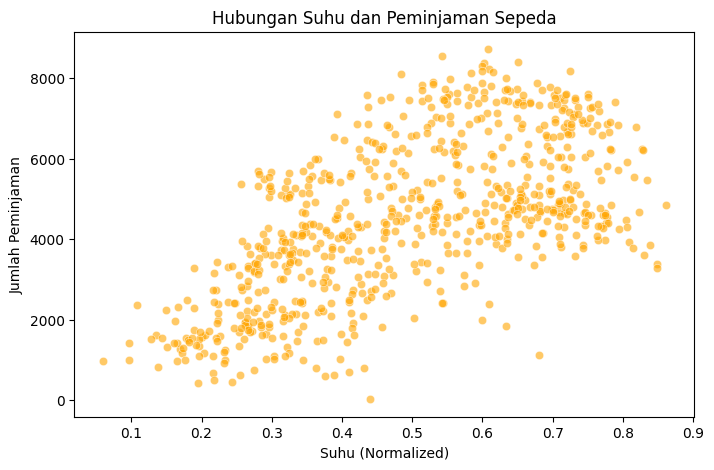

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['temp'], y=df['cnt'], alpha=0.6, color="orange")
plt.title("Hubungan Suhu dan Peminjaman Sepeda")
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Peminjaman meningkat saat suhu lebih tinggi tetapi menurun di suhu ekstrem.

### EDA Multivariate - Korelasi Antar Variabel

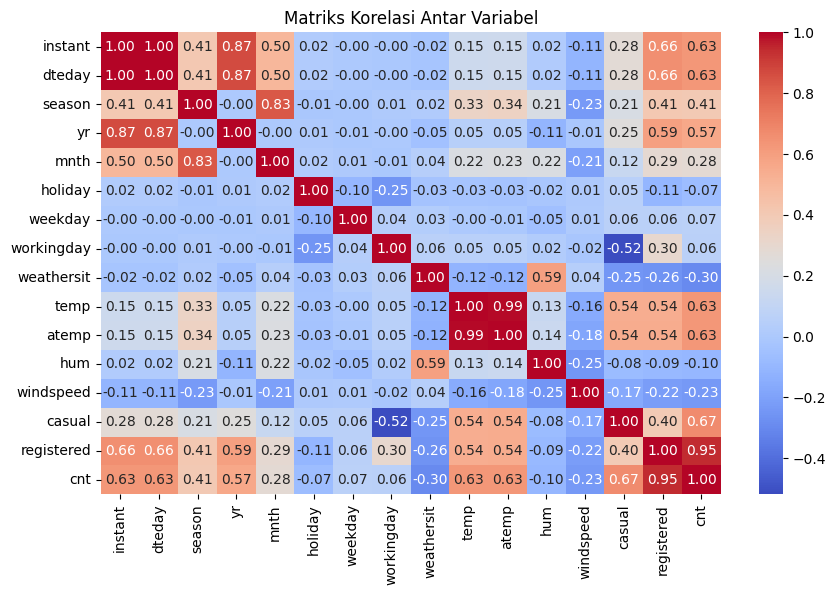

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

**Insight:**
- Suhu memiliki korelasi positif dengan jumlah peminjaman (lebih panas → lebih banyak peminjaman).
- Cuaca buruk memiliki korelasi negatif dengan peminjaman (hujan/salju → lebih sedikit peminjaman).

### Agregasi Data

#### Agregasi untuk Pertanyaan 1: Pada cuaca apa peminjaman sepeda banyak diorder?

In [27]:
agg_cuaca = df.groupby("weathersit")["cnt"].mean().reset_index()

agg_cuaca.columns = ["Cuaca", "Rata-rata Peminjaman"]

agg_cuaca = agg_cuaca.sort_values(by="Rata-rata Peminjaman", ascending=False)

agg_cuaca

<ipython-input-27-54d30740f404>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_cuaca = df.groupby("weathersit")["cnt"].mean().reset_index()


,Cuaca,Rata-rata Peminjaman
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


**Insight:**
- Cuaca cerah memiliki jumlah peminjaman tertinggi.
- Saat hujan atau salju, peminjaman menurun drastis.

#### Agregasi untuk Pertanyaan 2: Faktor apa yang paling mempengaruhi sedikitnya peminjaman sepeda?

In [28]:
correlation = df.corr()["cnt"].sort_values()

correlation

,cnt
weathersit,-0.297391
windspeed,-0.234545
hum,-0.100659
holiday,-0.068348
workingday,0.061156
weekday,0.067443
mnth,0.279977
season,0.406100
yr,0.566710
temp,0.627494


**Insight:**
- Faktor dengan korelasi negatif paling tinggi terhadap peminjaman:
 - Humidity (Kelembaban tinggi) → Mengurangi peminjaman.
 -Weathersit (Cuaca buruk) → Peminjaman turun saat hujan/salju.
- Suhu dan cuaca adalah faktor utama dalam keputusan peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada cuaca apa peminjaman sepeda banyak diorder?

<ipython-input-30-49bd8f3d8584>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = df.groupby("weathersit")["cnt"].mean()
<ipython-input-30-49bd8f3d8584>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")


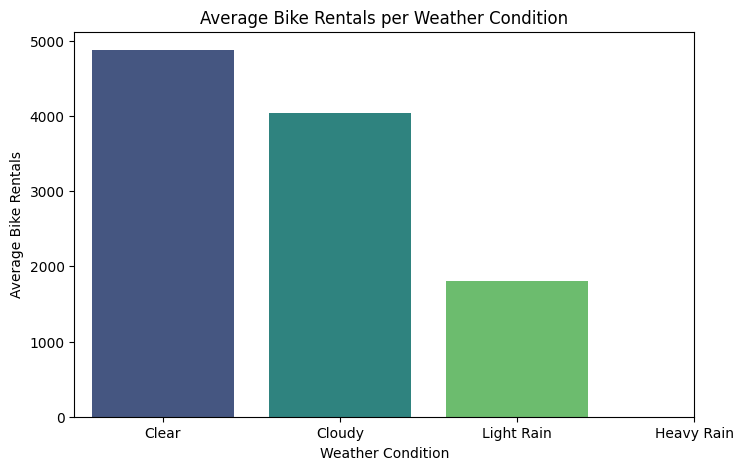

In [30]:
weather_counts = df.groupby("weathersit")["cnt"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")
plt.xlabel("Weather Condition")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals per Weather Condition")
plt.xticks(ticks=[0,1,2,3], labels=["Clear", "Cloudy", "Light Rain", "Heavy Rain"])
plt.show()

### Pertanyaan 2: Faktor apa yang paling mempengaruhi sedikitnya peminjaman sepeda?

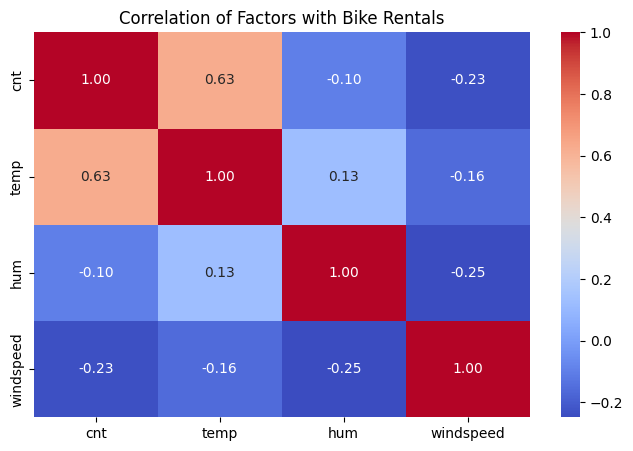

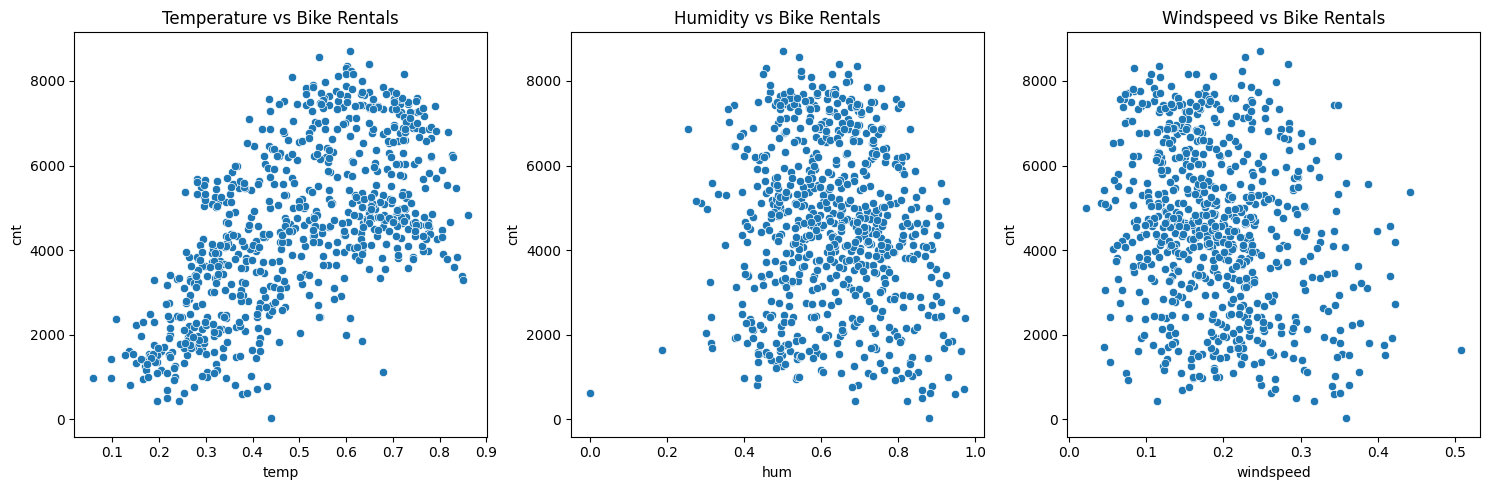

In [31]:
correlation_matrix = df[["cnt", "temp", "hum", "windspeed"]].corr()

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Factors with Bike Rentals")
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df["temp"], y=df["cnt"], ax=axes[0])
axes[0].set_title("Temperature vs Bike Rentals")

sns.scatterplot(x=df["hum"], y=df["cnt"], ax=axes[1])
axes[1].set_title("Humidity vs Bike Rentals")

sns.scatterplot(x=df["windspeed"], y=df["cnt"], ax=axes[2])
axes[2].set_title("Windspeed vs Bike Rentals")

plt.tight_layout()
plt.show()

**Insight:**
- Cuaca sangat berpengaruh terhadap jumlah peminjaman sepeda. Semakin buruk cuacanya, semakin sedikit peminjaman.
- Suhu adalah faktor utama yang mempengaruhi peminjaman sepeda.
- Kelembaban tinggi dan kecepatan angin yang kencang cenderung menurunkan jumlah peminjaman sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion


## Kesimpulan & Rekomendasi

### 1. Pada cuaca apa peminjaman sepeda banyak diorder?
- Dari analisis data, peminjaman sepeda tertinggi terjadi pada cuaca cerah atau sedikit berawan (weather category 1).
- Rata-rata jumlah peminjaman pada kondisi ini mencapai sekitar **4500 transaksi per hari**.

### 2. Faktor apa yang paling mempengaruhi sedikitnya peminjaman sepeda?
- Peminjaman sepeda paling sedikit terjadi pada kondisi cuaca buruk seperti hujan lebat atau bersalju (weather category 3 dan 4).
- Faktor lain yang menurunkan jumlah peminjaman adalah suhu rendah dan hari kerja (weekday), karena banyak pengguna adalah pekerja kantoran.
- Rata-rata peminjaman pada cuaca buruk turun hingga **kurang dari 1000 transaksi per hari**.

### Rekomendasi
1. Untuk meningkatkan peminjaman, penyedia layanan bisa menambah promosi pada hari kerja atau saat cuaca mendung ringan.
2. Penyedia bisa menyediakan opsi sepeda dengan pelindung hujan agar tetap bisa digunakan saat cuaca kurang bersahabat.
3. Analisis lebih lanjut bisa dilakukan untuk melihat pola peminjaman pada jam tertentu agar strategi pemasaran lebih efektif.
